<a href="https://colab.research.google.com/github/sarmi2325/Machine-Learning/blob/main/Validating_Model_Ad_Sale_Prediction_from_Existing_customer_Logistic_Regression_Validating_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validating Model - Ad. Sale Prediction from Existing customer - Logistic Regression

### *Importing Libraries*

In [1]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

### *Choose Dataset file from Local Directory*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


### *Load Dataset*

In [3]:
dataset = pd.read_csv('DigitalAd_dataset.csv')

### *Summarize Dataset*

In [4]:
print(dataset.shape)
print(dataset.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [5]:
X = dataset.iloc[:, :-1].values
X

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [6]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

### *Splitting Dataset into Train & Test*

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance,
###We want our test data to be a completely new and a surprise set for our model

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### *Training*

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### *Prediction for all Test Data*

In [10]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


# **Evaluating Model**

### *Confusion Matrix*

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[61  0]
 [20 19]]


### *Accuracy_Score*

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 80.0%


### *Receiver Operating Curve - ROC Curve*

[[0.91680628 0.08319372]
 [0.63097455 0.36902545]
 [0.12450803 0.87549197]
 [0.15270125 0.84729875]
 [0.81464411 0.18535589]
 [0.98336422 0.01663578]
 [0.97535949 0.02464051]
 [0.06143223 0.93856777]
 [0.98759982 0.01240018]
 [0.66185465 0.33814535]
 [0.99736246 0.00263754]
 [0.96087745 0.03912255]
 [0.99165228 0.00834772]
 [0.51261282 0.48738718]
 [0.60077844 0.39922156]
 [0.65587374 0.34412626]
 [0.10936571 0.89063429]
 [0.82110199 0.17889801]
 [0.55057034 0.44942966]
 [0.89361327 0.10638673]
 [0.96759256 0.03240744]
 [0.79040436 0.20959564]
 [0.96968122 0.03031878]
 [0.6694416  0.3305584 ]
 [0.98769833 0.01230167]
 [0.54427286 0.45572714]
 [0.99530673 0.00469327]
 [0.98628283 0.01371717]
 [0.1551148  0.8448852 ]
 [0.82471932 0.17528068]
 [0.9206896  0.0793104 ]
 [0.90295199 0.09704801]
 [0.66751986 0.33248014]
 [0.01345077 0.98654923]
 [0.99497724 0.00502276]
 [0.97997287 0.02002713]
 [0.9985336  0.0014664 ]
 [0.95687097 0.04312903]
 [0.99225587 0.00774413]
 [0.98336422 0.01663578]


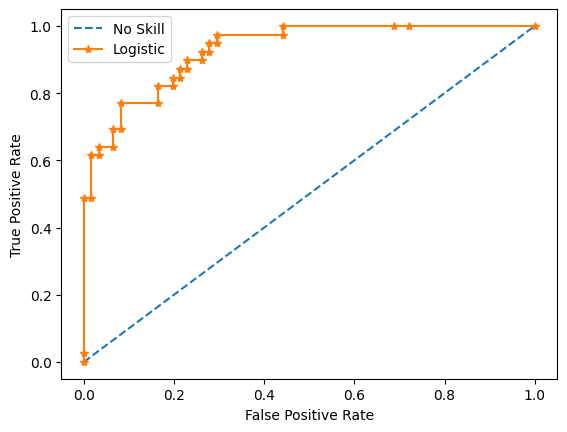

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(X_test)#will give 2D array. 0th(negatives) and 1st(positive)
# keep probabilities for the positive outcome only
lsProbability = lsProbability[:,1]
# calculate scores
nsAUC = roc_auc_score(y_test, nsProbability)
lrAUC = roc_auc_score(y_test, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)


# plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

### *Cross Validation Score*

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

CROSS VALIDATION SCORE: 82.50%


### *Stratifield K-fold Cross Validation*

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold, X, Y, cv=skfold)
print("STRATIFIELD K-FOLD SCORE: %.2f%%" % (results_skfold.mean()*100.0))

STRATIFIELD K-FOLD SCORE: 82.76%


### *Cumulative Accuracy Profile (CAP) Curve*

100
39


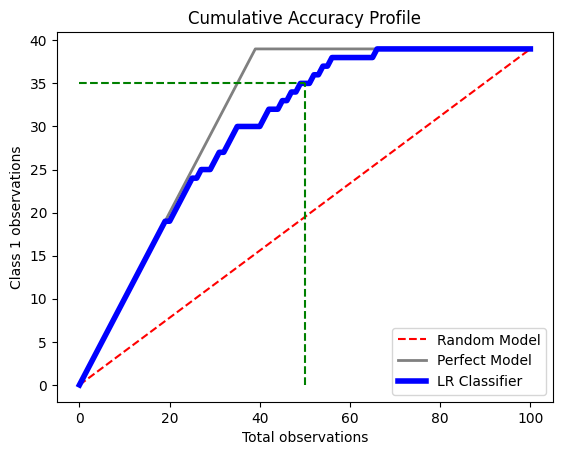

In [16]:
import matplotlib.pyplot as plt
#Calculate Totals and Class Counts
total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
##Plot Random Model Line
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

##Plot Perfect Model Line
plt.plot([0, class_1_count, total],
         [0, class_1_count, class_1_count],
         c = 'grey',
         linewidth = 2,
         label = 'Perfect Model')
##Compute and Plot the Model's CAP Curve
probs = model.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values,
         y_values,
         c = 'b',
         label = 'LR Classifier',
         linewidth = 4)

index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')